In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

dfBubble = pd.read_csv("bubbleFinalData-PC16.csv")
dfQuick = pd.read_csv("quickFinalData-PC16.csv")
dfCounting = pd.read_csv("countingFinalData-PC16.csv")
dfMerge = pd.read_csv("mergeFinalData-PC16.csv")

merge6 = pd.read_csv("mergeFinalData-PC6.csv")
merge16 = pd.read_csv("mergeFinalData-PC16.csv")
merge21 = pd.read_csv("mergeFinalData-PC21.csv")
merge23 = pd.read_csv("mergeFinalData-PC23.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'mergeFinalData-PC6.csv'

In [20]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

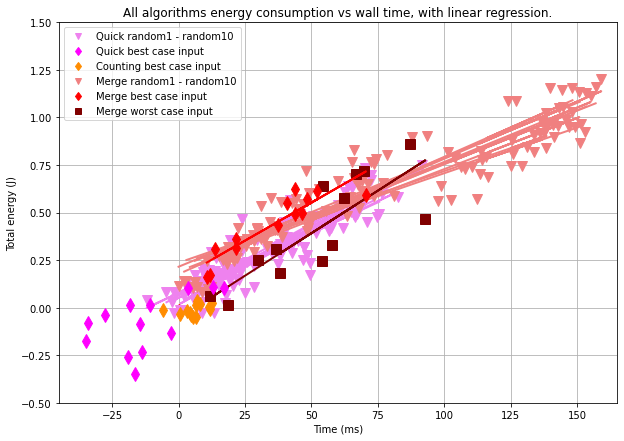

In [67]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# plt.plot(0,0,"v", color="mediumaquamarine",label="Bubble random1 - random10")
# plt.plot(0,0,"s", color="steelblue",label="Bubble worst case input")
# plt.plot(0,0,"d", color="cyan",label="Bubble best case input")
plt.plot(0,0,"v", color="violet",label="Quick random1 - random10")
# plt.plot(0,0,"s", color="darkmagenta",label="Quick worst case input")
plt.plot(0,0,"d", color="fuchsia",label="Quick best case input")
# plt.plot(0,0,"v", color="gold",label="Counting random1 - random10")
# plt.plot(0,0,"s", color="orangered",label="Counting worst case input")
plt.plot(0,0,"d", color="darkorange",label="Counting best case input")
plt.plot(0,0,"v", color="lightcoral",label="Merge random1 - random10")
plt.plot(0,0,"d", color="red",label="Merge best case input")
plt.plot(0,0,"s", color="maroon",label="Merge worst case input")



for i in range(1,11):
    Rs.append(polyReg(dfBubble[dfBubble["Input case"] == f"random{i}"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "mediumaquamarine",dots="v"))

for i in range(1,11):
    Rs.append(polyReg(dfQuick[dfQuick["Input case"] == f"random{i}"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "violet",dots="v"))

for i in range(1,11):
    Rs.append(polyReg(dfCounting[dfCounting["Input case"] == f"random{i}"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "gold",dots="v", regLine=False))

for i in range(1,11):
    Rs.append(polyReg(dfMerge[dfMerge["Input case"] == f"random{i}"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "lightcoral",dots="v"))

worst = polyReg(dfBubble[dfBubble["Input case"] == "worst"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "steelblue",dots="s")
best = polyReg(dfBubble[dfBubble["Input case"] == "best"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "cyan",dots="d")

worst = polyReg(dfCounting[dfCounting["Input case"] == "worst"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "orangered",dots="s", regLine=False)
best = polyReg(dfCounting[dfCounting["Input case"] == "best"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "darkorange",dots="d", regLine=False)

worst = polyReg(dfMerge[dfMerge["Input case"] == "worst"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "maroon",dots="s")
best = polyReg(dfMerge[dfMerge["Input case"] == "best"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "red",dots="d")

worst = polyReg(dfQuick[dfQuick["Input case"] == "worst"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "darkmagenta",dots="s")
best = polyReg(dfQuick[dfQuick["Input case"] == "best"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "fuchsia",dots="d", regLine=False)



# print(f"best R2 ", best[1], "\n")
plt.title("All algorithms energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(-45, 165)
plt.ylim(-0.5,1.5)
plt.legend()
plt.grid()
plt.show()


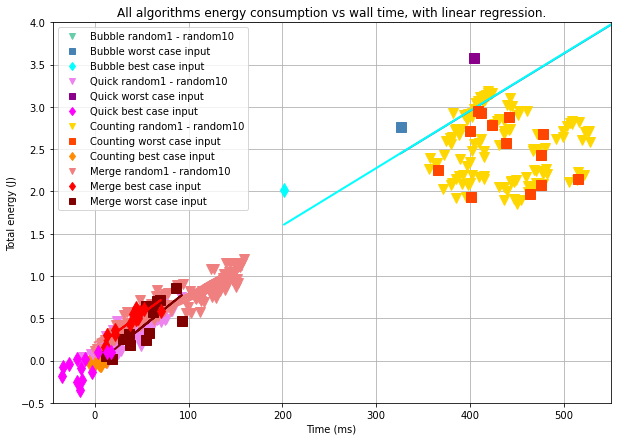

In [68]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(0,0,"v", color="mediumaquamarine",label="Bubble random1 - random10")
plt.plot(0,0,"s", color="steelblue",label="Bubble worst case input")
plt.plot(0,0,"d", color="cyan",label="Bubble best case input")
plt.plot(0,0,"v", color="violet",label="Quick random1 - random10")
plt.plot(0,0,"s", color="darkmagenta",label="Quick worst case input")
plt.plot(0,0,"d", color="fuchsia",label="Quick best case input")
plt.plot(0,0,"v", color="gold",label="Counting random1 - random10")
plt.plot(0,0,"s", color="orangered",label="Counting worst case input")
plt.plot(0,0,"d", color="darkorange",label="Counting best case input")
plt.plot(0,0,"v", color="lightcoral",label="Merge random1 - random10")
plt.plot(0,0,"d", color="red",label="Merge best case input")
plt.plot(0,0,"s", color="maroon",label="Merge worst case input")



for i in range(1,11):
    Rs.append(polyReg(dfBubble[dfBubble["Input case"] == f"random{i}"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "mediumaquamarine",dots="v"))

for i in range(1,11):
    Rs.append(polyReg(dfQuick[dfQuick["Input case"] == f"random{i}"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "violet",dots="v"))

for i in range(1,11):
    Rs.append(polyReg(dfCounting[dfCounting["Input case"] == f"random{i}"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "gold",dots="v", regLine=False))

for i in range(1,11):
    Rs.append(polyReg(dfMerge[dfMerge["Input case"] == f"random{i}"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "lightcoral",dots="v"))

worst = polyReg(dfBubble[dfBubble["Input case"] == "worst"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "steelblue",dots="s")
best = polyReg(dfBubble[dfBubble["Input case"] == "best"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "cyan",dots="d")

worst = polyReg(dfCounting[dfCounting["Input case"] == "worst"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "orangered",dots="s", regLine=False)
best = polyReg(dfCounting[dfCounting["Input case"] == "best"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "darkorange",dots="d", regLine=False)

worst = polyReg(dfMerge[dfMerge["Input case"] == "worst"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "maroon",dots="s")
best = polyReg(dfMerge[dfMerge["Input case"] == "best"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "red",dots="d")

worst = polyReg(dfQuick[dfQuick["Input case"] == "worst"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "darkmagenta",dots="s")
best = polyReg(dfQuick[dfQuick["Input case"] == "best"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "fuchsia",dots="d", regLine=False)



# print(f"best R2 ", best[1], "\n")
plt.title("All algorithms energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(-45, 550)
plt.ylim(-0.5,4)
plt.legend()
plt.grid()
plt.show()


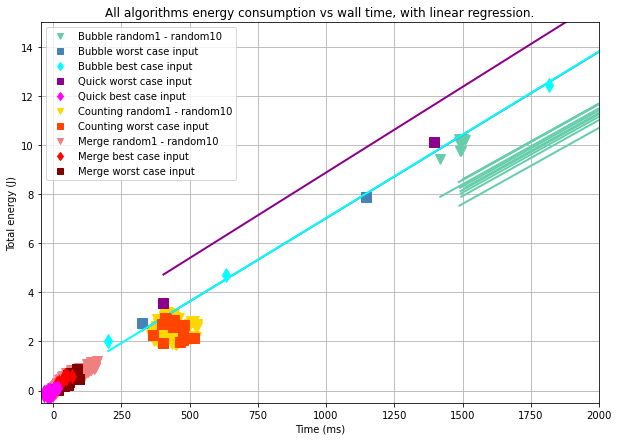

In [69]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(0,0,"v", color="mediumaquamarine",label="Bubble random1 - random10")
plt.plot(0,0,"s", color="steelblue",label="Bubble worst case input")
plt.plot(0,0,"d", color="cyan",label="Bubble best case input")
# plt.plot(0,0,"v", color="violet",label="Quick random1 - random10")
plt.plot(0,0,"s", color="darkmagenta",label="Quick worst case input")
plt.plot(0,0,"d", color="fuchsia",label="Quick best case input")
plt.plot(0,0,"v", color="gold",label="Counting random1 - random10")
plt.plot(0,0,"s", color="orangered",label="Counting worst case input")
# plt.plot(0,0,"d", color="darkorange",label="Counting best case input")
plt.plot(0,0,"v", color="lightcoral",label="Merge random1 - random10")
plt.plot(0,0,"d", color="red",label="Merge best case input")
plt.plot(0,0,"s", color="maroon",label="Merge worst case input")



for i in range(1,11):
    Rs.append(polyReg(dfBubble[dfBubble["Input case"] == f"random{i}"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "mediumaquamarine",dots="v"))

for i in range(1,11):
    Rs.append(polyReg(dfQuick[dfQuick["Input case"] == f"random{i}"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "violet",dots="v"))

for i in range(1,11):
    Rs.append(polyReg(dfCounting[dfCounting["Input case"] == f"random{i}"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "gold",dots="v", regLine=False))

for i in range(1,11):
    Rs.append(polyReg(dfMerge[dfMerge["Input case"] == f"random{i}"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "lightcoral",dots="v"))

worst = polyReg(dfBubble[dfBubble["Input case"] == "worst"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "steelblue",dots="s")
best = polyReg(dfBubble[dfBubble["Input case"] == "best"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "cyan",dots="d")

worst = polyReg(dfCounting[dfCounting["Input case"] == "worst"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "orangered",dots="s", regLine=False)
best = polyReg(dfCounting[dfCounting["Input case"] == "best"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "darkorange",dots="d", regLine=False)

worst = polyReg(dfMerge[dfMerge["Input case"] == "worst"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "maroon",dots="s")
best = polyReg(dfMerge[dfMerge["Input case"] == "best"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "red",dots="d")

worst = polyReg(dfQuick[dfQuick["Input case"] == "worst"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "darkmagenta",dots="s")
best = polyReg(dfQuick[dfQuick["Input case"] == "best"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "fuchsia",dots="d", regLine=False)



# print(f"best R2 ", best[1], "\n")
plt.title("All algorithms energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(-45, 2000)
plt.ylim(-0.5,15)
plt.legend()
plt.grid()
plt.show()


In [87]:
from scipy import stats

def getSlope(df, name, case):
    y = df[df["Input case"]==case]["full EC"]
    x = df[df["Input case"]==case]["Time - readCSV"]

    slope, intercept, r, p, std_err = stats.linregress(x, y)
    print(f"{name} {case} has slope: {slope*1000}")

Bubble random1 has slope: 6.186445510556569
Bubble random2 has slope: 6.1912295188339375
Bubble random3 has slope: 6.186820006178224
Bubble random4 has slope: 6.193572826569195
Bubble random5 has slope: 6.178444549672966
Bubble random6 has slope: 6.1883012153752865
Bubble random7 has slope: 6.187304450061907
Bubble random8 has slope: 6.188088205553007
Bubble random9 has slope: 6.182646398152831
Bubble random10 has slope: 6.182375125615595
Quick random1 has slope: 6.415742007285154
Quick random2 has slope: 8.403691187564148
Quick random3 has slope: 7.803195437964344
Quick random4 has slope: 8.043972092527879
Quick random5 has slope: 6.769991686356349
Quick random6 has slope: 7.085698399187044
Quick random7 has slope: 6.308414228126236
Quick random8 has slope: 6.610877124509363
Quick random9 has slope: 7.560752469083245
Quick random10 has slope: 7.774812212868409
Counting random1 has slope: -2.662891453642728
Counting random2 has slope: -1.7693946162794214
Counting random3 has slope: 0.9

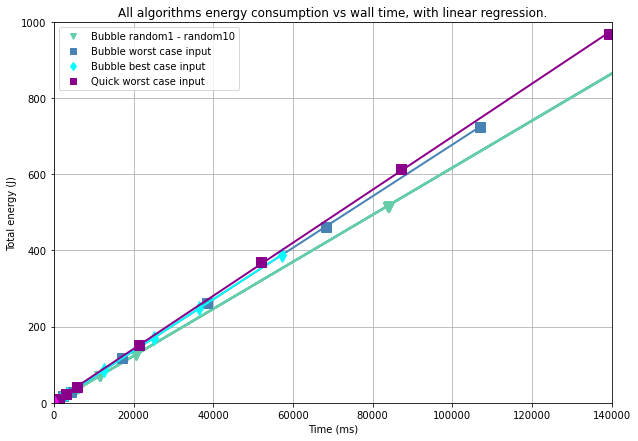

In [89]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(0,0,"v", color="mediumaquamarine",label="Bubble random1 - random10")
plt.plot(0,0,"s", color="steelblue",label="Bubble worst case input")
plt.plot(0,0,"d", color="cyan",label="Bubble best case input")
# plt.plot(0,0,"v", color="violet",label="Quick random1 - random10")
plt.plot(0,0,"s", color="darkmagenta",label="Quick worst case input")
# plt.plot(0,0,"d", color="fuchsia",label="Quick best case input")
# plt.plot(0,0,"v", color="gold",label="Counting random1 - random10")
# plt.plot(0,0,"s", color="orangered",label="Counting worst case input")
# plt.plot(0,0,"d", color="darkorange",label="Counting best case input")
# plt.plot(0,0,"v", color="lightcoral",label="Merge random1 - random10")
# plt.plot(0,0,"d", color="red",label="Merge best case input")
# plt.plot(0,0,"s", color="maroon",label="Merge worst case input")



for i in range(1,11):
    Rs.append(polyReg(dfBubble[dfBubble["Input case"] == f"random{i}"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "mediumaquamarine",dots="v"))
    getSlope(dfBubble, "Bubble", "random"+str(i))


for i in range(1,11):
    Rs.append(polyReg(dfQuick[dfQuick["Input case"] == f"random{i}"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "violet",dots="v"))
    getSlope(dfQuick, "Quick", "random"+str(i))

for i in range(1,11):
    Rs.append(polyReg(dfCounting[dfCounting["Input case"] == f"random{i}"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "gold",dots="v", regLine=False))
    getSlope(dfCounting, "Counting", "random"+str(i))

for i in range(1,11):
    Rs.append(polyReg(dfMerge[dfMerge["Input case"] == f"random{i}"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "lightcoral",dots="v"))
    getSlope(dfMerge, "Merge", "random"+str(i))

worst = polyReg(dfBubble[dfBubble["Input case"] == "worst"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "steelblue",dots="s")
Mbest = polyReg(dfBubble[dfBubble["Input case"] == "best"]["Time - readCSV"], dfBubble[dfBubble["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "cyan",dots="d")
getSlope(dfBubble, "Bubble", "best")
getSlope(dfBubble, "Bubble", "worst")

worst = polyReg(dfCounting[dfCounting["Input case"] == "worst"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "orangered",dots="s", regLine=False)
best = polyReg(dfCounting[dfCounting["Input case"] == "best"]["Time - readCSV"], dfCounting[dfCounting["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "darkorange",dots="d", regLine=False)

worst = polyReg(dfMerge[dfMerge["Input case"] == "worst"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "maroon",dots="s")
best = polyReg(dfMerge[dfMerge["Input case"] == "best"]["Time - readCSV"], dfMerge[dfMerge["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "red",dots="d")
getSlope(dfMerge, "Merge", "best")
getSlope(dfMerge, "Merge", "worst")

worst = polyReg(dfQuick[dfQuick["Input case"] == "worst"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "darkmagenta",dots="s")
best = polyReg(dfQuick[dfQuick["Input case"] == "best"]["Time - readCSV"], dfQuick[dfQuick["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "fuchsia",dots="d", regLine=False)
getSlope(dfQuick, "Quick", "worst")
# print(f"best R2 ", best[1], "\n")
plt.title("All algorithms energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(-45, 140000)
plt.ylim(-0.5,1000)
plt.legend()
plt.grid()
plt.show()
